# Introduction to Image Processing

## Data Representation

Images are typically not represented as 64-bit float numbers. Instead, to save space, typically 8-bit unsigned integers are used, giving us 256 gray-levels. However, watch out when working with unsigned integers:

In [1]:
%pylab inline
# Watch out for overflow when working with unsigned integers!!
x = arange(10, dtype=uint8)
print(x+250)

Populating the interactive namespace from numpy and matplotlib
[250 251 252 253 254 255   0   1   2   3]


### Where is up?

We are used to representing 2d maps with x/y coordinates, the first denoting horixontal, from left to right, and the second denoting vertical, from down to up.

However, when we index matrices, the first index denotes the rows, from top to bottom; and the second index the columns, from left to right:

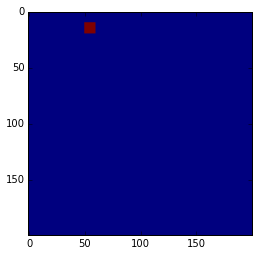

In [2]:
data = zeros((200,200), dtype=uint8)
data[10:20, 50:60]=255
imshow(data)

### Color representations

#### With Colormaps

gray() sets the colormap to "gray". Type help(colormaps) and CTRL+ENTER for more information.

<matplotlib.colorbar.Colorbar instance at 0x095113F0>

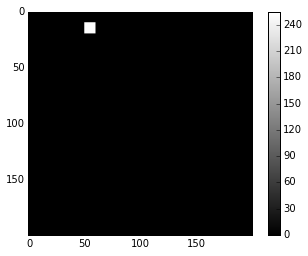

In [3]:
gray()
imshow(data)
colorbar()

<matplotlib.colorbar.Colorbar instance at 0x09798350>

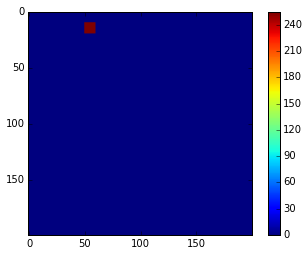

In [4]:
jet()
imshow(data)
colorbar()

#### As RGB (Red-Green-Blue)

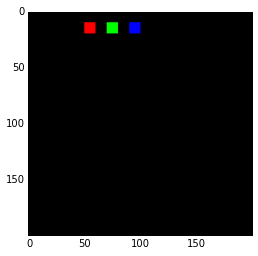

In [5]:
data_c = zeros((200,200,3), dtype=uint8)
data_c[10:20, 50:60, 0] = 255
data_c[10:20, 70:80, 1] = 255
data_c[10:20, 90:100, 2] = 255
imshow(data_c)

## Simple Image Manipulations

$R = \sqrt{x^2 + y^2}$

Note that you can use boolean expressions to address areas with specific properties in the image.

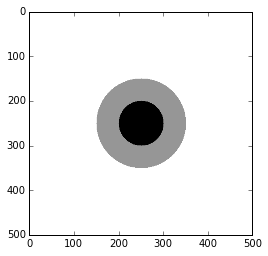

In [6]:
myrange = arange(-250,250)
X,Y = meshgrid(myrange, myrange)
Z = zeros(X.shape)

# Iris & pupil
R = sqrt(X**2+Y**2)
Z[R>50]=150
Z[R>100] = 255
gray()
imshow(Z)

The only tricky thing in the next step: I use "int32" to convert the result to integer (we can only set individual points), and use "250+..." to shift things into th middle of our plot.

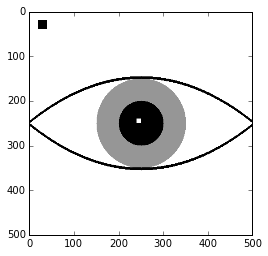

In [7]:
# Eyelids
polyPars = polyfit([-250, 0, 250], [0, 100, 0], 2)
x = arange(-250,250)
y = int32(polyval(polyPars, x))

lidThickness = 6
for ii in range(lidThickness):
    Z[ 250 + y+ii, 250 + x] = 1
    Z[ 250 - y-ii, 250 + x] = 1

# Add a few beauty spots
Z[20:40, 20:40] = 0
Z[240:250, 240:250] = 255
imshow(Z)

### Saving a Figure

We can save the figure to PNG, JPEG, and other formats.

**Attention!** compressed image formats, e.g. JPEG, discard information by throwing away image details. Therefore they are not suited for storing image processed data.

In [8]:
# Save the figure
print('Z has the shape {0}'.format(Z.shape))
outFile = 'test.png'
imsave(outFile, Z)

Z has the shape (500, 500)


### Loading a Color Image

In [9]:
# Load the data again
# The 4th channel is used to indicate the alpha-transparency.

data = imread(outFile)
print('"data" has the shape {0}'.format(data.shape))

"data" has the shape (500, 500, 4)


## Data Filtering - Linear Filters

For working with images, a number of different resources exist:

- [ndimage](http://docs.scipy.org/doc/scipy/reference/ndimage.html): SciPy functions for n-dimensional image processing
- [PIL](http://pillow.readthedocs.org/en/latest/index.html): the Python Image Library (now developed under the name "Pillow"). simple routines to manipulate images: resize, color conversions, simple filtering. Object oriented.
- [scikit-image](http://scikit-image.org/): a very "pythonic" collection of algorithms for image processing
- [opencv](http://opencv.org/): an open source image processing library written in C/C++, and designed for computational efficiency and with a strong focus on real-time applications.

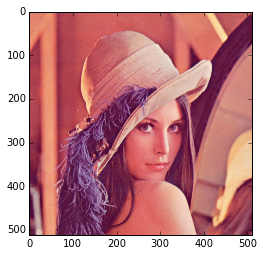

In [10]:
from skimage.data import lena
img = lena()
imshow(img)

### Conversiont to Grayscale

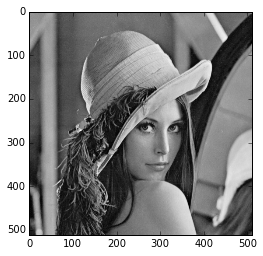

In [11]:
img_g = img.dot([0.2125, 0.7154, 0.0721]).astype(uint8)
imshow(img_g)
gray()

### Python Image Library

<type 'numpy.ndarray'>
<PIL.Image.Image image mode=L size=512x512 at 0x9A4B0D0>


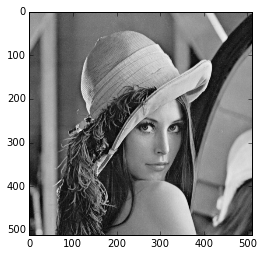

In [12]:
import PIL
pil_img = PIL.Image.fromarray(img)
pil_g = pil_img.convert('L')
imshow(pil_g)

# Note the data-types: PIL provides a PIL-image!
print(type(img))
print(pil_g)

### Image Processing Routines in SciPy

*scipy* contains a number of general image processing routines:
http://docs.scipy.org/doc/scipy/reference/ndimage.html

For details on convolutions, see:
http://stackoverflow.com/questions/16121269/2d-convolution-in-python-similar-to-matlabs-conv2

[[155 155 154 153 155]
 [155 155 154 153 155]
 [155 155 154 153 155]
 [155 155 154 153 155]
 [155 155 154 153 155]]
[[465 619 616 615 611]
 [  0   0   0   0   0]
 [  0   0   0   0   0]
 [  0   0   0   0   0]
 [  6   2 -11 -16  -6]
 [ -9  -6   1  -4  -2]]
[[209 107 104 103  99]
 [  0   0   0   0   0]
 [  0   0   0   0   0]
 [  0   0   0   0   0]
 [  6   2 245 240 250]
 [247 250   1 252 254]]


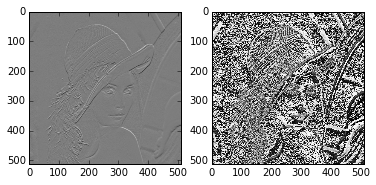

In [13]:
from scipy import ndimage

Filter = array([[1, 0, -1],
                [2, 0, -2],
                [1, 0, -1]])

img_filtered_int = ndimage.convolve(int16(img_g), Filter.T, mode='constant', cval=0.0)
img_filtered_uint8 = ndimage.convolve(img_g, Filter.T, mode='constant', cval=0.0)
print(uint8(img_g)[:5, :5])
print(img_filtered_int[:6, :5])
print(img_filtered_uint8[:6, :5])

'''
# If you want to handle negative numbers and overflows here, you have to do it by hand:
img_filtered[img_filtered<0] = 0
img_filtered[img_filtered>255] = 255
img_filtered = uint8(img_filtered)
'''
fig, axs = subplots(1,2)
axs[0].imshow(img_filtered_int)
axs[1].imshow(img_filtered_uint8)

Note that different functions handle the edge-areas different, but deliver the same results for the rest of the image.

[[155 465 619 616 615]
 [155 465 619 616 615]
 [  0   0   0   0   0]
 [  0   0   0   0   0]
 [  0   0   0   0   0]
 [  2   6   2 -11 -16]
 [ -3  -9  -6   1  -4]]


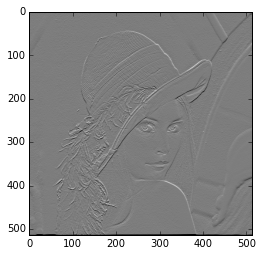

In [14]:
from scipy.signal import convolve2d
filtered = convolve2d(img_g, Filter.T)
print(filtered[:7, :5])
imshow(filtered)

## scikit-image

This is a Python package dedicated to image processing.

http://scikit-image.org/

Note that scikit-image does not have an own 2d linear filter, since this already exists in scipy (see also http://stackoverflow.com/questions/23208232/image-filtering-with-scikit-image)

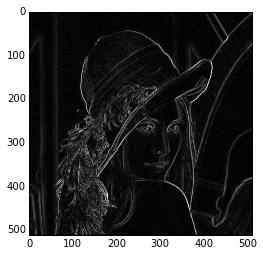

In [15]:
from skimage import filters
filtered = filters.sobel(img_g)
imshow(filtered)

## openCV

[[ -0.  -0.  -0.  -0.  -0.]
 [ -0.  -0.  -0.  -0.  -0.]
 [ -0.  -0.  -0.  -0.  -0.]
 [ -0.  -0.  -0.  -0.  -0.]
 [  8.   2. -11. -16.  -6.]
 [-12.  -6.   1.  -4.  -2.]]


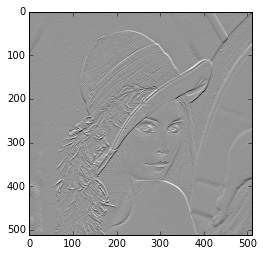

In [16]:
import cv2
filtered = -cv2.filter2D((img_g), cv2.CV_32F, Filter.T)            
imshow(filtered)
print(filtered[:6, :5])

## Data Filtering - Nonlinear Filters

In the following, I compare "closing" functions from three different packages. "Closing" is a morphological operation, where you first "dilate" and then "erode" and image with a "structuring element". It can be used e.g. to eliminate the eyelids in the image. For more information on morphological operations, see e.g. https://en.wikipedia.org/wiki/Mathematical_morphology.

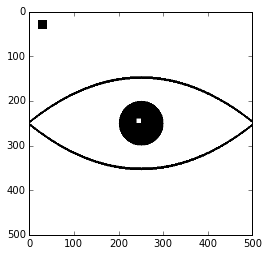

In [17]:
from scipy.ndimage.morphology import binary_closing
from skimage.morphology import closing, square
import cv2

# To keep things simple, let us first generate a binary image
data = imread(outFile)
bw = data[:,:,0]>0.5
bw_uint8 = uint8(bw*255)
imshow(bw_uint8)

# Use a square with side-length 20 as "sturctural element"
strel = square(20)

In [18]:
print 'Scikit Image:'
%timeit out = closing(bw, strel)

print 'Scipy:'
%timeit out = binary_closing(bw, strel)

print 'OpenCV:'
%timeit out = cv2.morphologyEx(bw_uint8, cv2.MORPH_CLOSE, strel)

Scikit Image:
1 loops, best of 3: 713 ms per loop
Scipy:
10 loops, best of 3: 190 ms per loop
OpenCV:
The slowest run took 317.65 times longer than the fastest. This could mean that an intermediate result is being cached 
1 loops, best of 3: 1.03 ms per loop


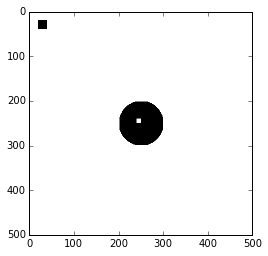

In [19]:
# Just to show you what it looks like:
out = closing(bw_uint8, strel)
imshow(out)